<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#make_circle" data-toc-modified-id="make_circle-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>make_circle</a></span></li><li><span><a href="#support-vector-machine" data-toc-modified-id="support-vector-machine-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>support vector machine</a></span></li><li><span><a href="#validation" data-toc-modified-id="validation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>validation</a></span></li><li><span><a href="#RandomizedSearchCV" data-toc-modified-id="RandomizedSearchCV-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>RandomizedSearchCV</a></span></li><li><span><a href="#ParameterGrid" data-toc-modified-id="ParameterGrid-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ParameterGrid</a></span></li><li><span><a href="#아주-중요한-기법!" data-toc-modified-id="아주-중요한-기법!-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>아주 중요한 기법!</a></span><ul class="toc-item"><li><span><a href="#위대한-발견의-시작-:-우연한-실수" data-toc-modified-id="위대한-발견의-시작-:-우연한-실수-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>위대한 발견의 시작 : 우연한 실수</a></span></li><li><span><a href="#하이퍼-파라미터-대신-알고리즘-찾기" data-toc-modified-id="하이퍼-파라미터-대신-알고리즘-찾기-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>하이퍼 파라미터 대신 알고리즘 찾기</a></span></li><li><span><a href="#인간의-실수는-끝이-없고-같은-실수를-반복한다" data-toc-modified-id="인간의-실수는-끝이-없고-같은-실수를-반복한다-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>인간의 실수는 끝이 없고 같은 실수를 반복한다</a></span></li><li><span><a href="#그러나,-우리는-답을-찾을-것이다." data-toc-modified-id="그러나,-우리는-답을-찾을-것이다.-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>그러나, 우리는 답을 찾을 것이다.</a></span></li></ul></li><li><span><a href="#FunctionTransformer" data-toc-modified-id="FunctionTransformer-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>FunctionTransformer</a></span></li><li><span><a href="#이론" data-toc-modified-id="이론-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>이론</a></span><ul class="toc-item"><li><span><a href="#garbage-in,-garbage-out" data-toc-modified-id="garbage-in,-garbage-out-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>garbage in, garbage out</a></span></li><li><span><a href="#data-cleaning" data-toc-modified-id="data-cleaning-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>data cleaning</a></span></li><li><span><a href="#raw-data--vs--featured-data" data-toc-modified-id="raw-data--vs--featured-data-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>raw data  vs  featured data</a></span></li><li><span><a href="#feature-selection" data-toc-modified-id="feature-selection-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>feature selection</a></span></li></ul></li></ul></div>

# [AI 오픈 이노베이션] 기본 저녁반<a class="tocSkip">
GitHub link: [https://github.com/realblack0/ai_lecture_fundamental](https://github.com/realblack0/ai_lecture_fundamental)  
E-Mail: realblack0@gmail.com

## make_circle

In [1]:
from sklearn.datasets import make_circles

In [7]:
data = make_circles() # noise는 outlier 옵션

In [8]:
X, y = data

In [9]:
import pandas as pd

In [10]:
data_pd = pd.DataFrame(X)
data_ta = pd.DataFrame(y, columns=["target"])

In [11]:
circle = pd.concat([data_pd, data_ta], axis=1)

In [12]:
import seaborn as sns

In [13]:
circle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
0         100 non-null float64
1         100 non-null float64
target    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [14]:
circle.describe()

,0,1,target
count,1.000000e+02,1.000000e+02,100.000000
mean,2.609024e-17,2.220446e-18,0.500000
std,6.435382e-01,6.435382e-01,0.502519
min,-1.000000e+00,-9.980267e-01,0.000000
25%,-6.374240e-01,-6.164106e-01,0.000000
50%,3.816392e-17,-1.286498e-16,0.500000
75%,6.374240e-01,6.164106e-01,1.000000
max,1.000000e+00,9.980267e-01,1.000000


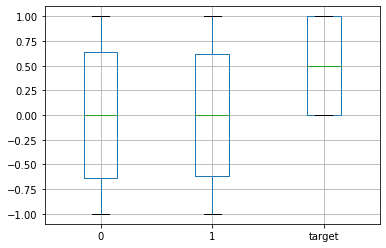

In [15]:
circle.boxplot()

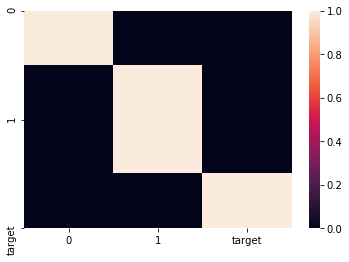

In [16]:
sns.heatmap(circle.corr())

`make_circle`이라서 원을 만들었다. 

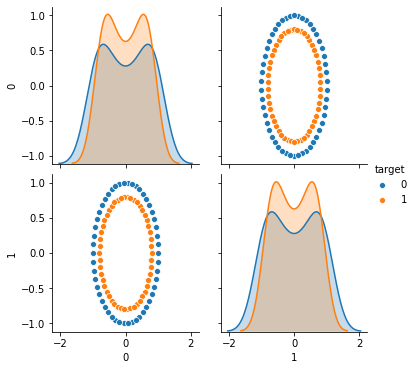

In [17]:
sns.pairplot(circle, hue="target")

데이터의 분포가 원 형태로 되어있어서 직선으로 분류가 안될 것 같다.  
linear 알고리즘을 쓸 수 없을 것 같다.  

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [19]:
# solver="liblinear"  =>  warning 안보이게 하려고 씀
# default 값과  같음
cross_val_score(LogisticRegression(solver="liblinear"), circle.iloc[:,:-1], circle.iloc[:, -1], cv=10)

array([0.2, 0.3, 0.5, 0.3, 0.3, 0.4, 0.3, 0.2, 0.2, 0.3])

비선형 알고리즘을 써보자.  
선형 모델을 썼을 때보다 성능이 확실히 높아졌다.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
cross_val_score(KNeighborsClassifier(), circle.iloc[:,:-1], circle.iloc[:, -1], cv=10)

array([0.5, 0.7, 0.5, 0.8, 0.6, 0.5, 0.5, 0.6, 0.6, 0.5])


하지만, 차원을 왜곡하면 선형으로 분류가 가능하다.

## support vector machine

In [22]:
from sklearn.svm import SVC # C가 붙으면 classifier
from sklearn.svm import SVR # R이 붙으면 regressor

In [23]:
from sklearn.svm import LinearSVC # Linear가 붕느

In [24]:
cross_val_score(SVC(), circle.iloc[:,:-1], circle.iloc[:, -1], cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [25]:
cross_val_score(LinearSVC(),
                circle.iloc[:, :-1], circle.iloc[:, -1], cv=10)

array([0.2, 0.3, 0.5, 0.3, 0.3, 0.4, 0.3, 0.2, 0.2, 0.3])

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
grid = GridSearchCV(KNeighborsClassifier(), {"n_neighbors":range(2, 7)})

In [28]:
grid.fit(circle.iloc[:, :-1], circle.iloc[:, -1],)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(2, 7)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [29]:
grid.best_params_

{'n_neighbors': 2}

In [30]:
grid.best_score_

0.8300000000000001

In [31]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005000,0.000893,0.006400,0.001019,2,{'n_neighbors': 2},0.85,0.80,0.75,0.80,0.95,0.83,0.067823,1
1,0.004800,0.001167,0.006002,0.000896,3,{'n_neighbors': 3},0.95,0.75,1.00,0.65,0.75,0.82,0.132665,2
2,0.003198,0.000749,0.004202,0.000401,4,{'n_neighbors': 4},0.95,0.70,1.00,0.60,0.75,0.80,0.151658,3
3,0.003810,0.000404,0.004190,0.001166,5,{'n_neighbors': 5},0.60,0.55,0.80,0.50,0.70,0.63,0.107703,5
4,0.002797,0.000398,0.004202,0.000749,6,{'n_neighbors': 6},0.65,0.75,0.80,0.55,0.70,0.69,0.086023,4


## validation

오버피팅 여부 확인할 때 사용한다.

In [32]:
from sklearn.model_selection import validation_curve

In [33]:
param_range = [1, 10, 100]

In [34]:
train_s, test_s = validation_curve(LinearSVC(), circle.iloc[:, :-1], circle.iloc[:, -1], "C", param_range, cv=10)

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

In [35]:
from sklearn_evaluation import plot

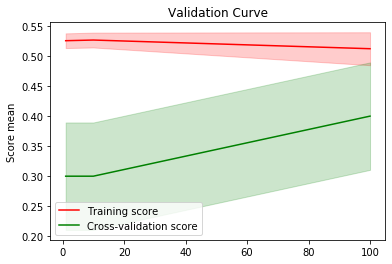

In [36]:
plot.validation_curve(train_s, test_s, param_range)

## RandomizedSearchCV

GridSearchCV보다 성능이 좋다.  
랜덤하게 파라미터를 바꾸기 때문에 규칙적인 방식보다 최적의 하이퍼 파라미터를 찾을 확률이 높아진다.

In [37]:
from sklearn.model_selection import RandomizedSearchCV

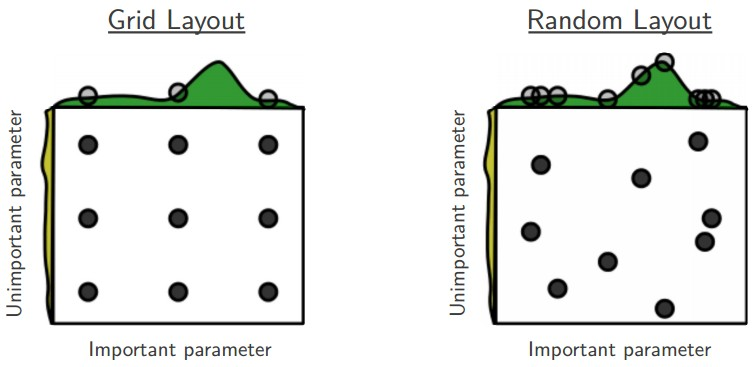

## ParameterGrid

내가 파라미터를 좀 더 계획적으로 테스트하기 위해서 사용한다.

In [38]:
from sklearn.model_selection import ParameterGrid

In [39]:
pg = ParameterGrid({"n_neighbors":[2,3,4,5,6]})

In [40]:
pg.param_grid

[{'n_neighbors': [2, 3, 4, 5, 6]}]

제일 처음에 `ParameterGrid`를 만들어 놓으면, 전체 코드를 수정할 필요 없이 이 객체만 바꾸면 된다.   

In [42]:
# list이므로 수정 가능
pg.param_grid.append({"weights":["uniform", "distance"]})

In [43]:
pg.param_grid

[{'n_neighbors': [2, 3, 4, 5, 6]}, {'weights': ['uniform', 'distance']}]

원래 방식으로 만들면 파라미터를 수정하기 위해서 일일히 코드를 찾아서 수정해야 한다.

In [44]:
grid = GridSearchCV(KNeighborsClassifier(), {"n_neighbors":range(2, 7)})

`ParameterGrid`를 쓰면 전체 코드를 수정할 필요 없다.

In [45]:
grid = GridSearchCV(KNeighborsClassifier(), pg.param_grid)

## 아주 중요한 기법!

### 위대한 발견의 시작 : 우연한 실수

이해를 위해서 우선 일부러 에러가 나도록 코드를 작성해본다.  
인스턴스는 되지만 `fit`이 안된다.

In [86]:
grid = GridSearchCV(KNeighborsClassifier(), {"estimator":[KNeighborsClassifier(), LinearSVC()]}, cv=10)

In [ ]:
# Error
grid.fit(circle.iloc[:, :-1], circle.iloc[:, -1])

에러 메시지가 다음과 같이 뜬다.  
estimator에 있는 parameter 이름만 넣을 수 있으니 `get_params`를 확인하라고 한다.
```python
ValueError: Invalid parameter estimator for estimator KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'). Check the list of available parameters with `estimator.get_params().keys()`.

```

`GridSearchCV`는 `get_params`에 있는 parameter만 넣을 수 있다.

In [66]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### 하이퍼 파라미터 대신 알고리즘 찾기

`Pipeline`에 이해가 깊은 사람들이, 위 에러를 보고 아이디어를 냈다.  
`Pipeline`에는 알고리즘을 파라미터처럼 넣을 수 있었다.

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
pipe = Pipeline([("clf", KNeighborsClassifier())])

'clf'에 KNN 알고리즘이 들어있다.

In [50]:
pipe.get_params()

{'memory': None,
 'steps': [('clf',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                        weights='uniform'))],
 'verbose': False,
 'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'clf__algorithm': 'auto',
 'clf__leaf_size': 30,
 'clf__metric': 'minkowski',
 'clf__metric_params': None,
 'clf__n_jobs': None,
 'clf__n_neighbors': 5,
 'clf__p': 2,
 'clf__weights': 'uniform'}

`GridSearchCV`에는 `Pipeline`을 넣을 수 있었다.  
알고리즘을 param_grid에 넣었더니 학습이 되는 것을 발견했다.

In [51]:
grid = GridSearchCV(pipe, {"clf":[KNeighborsClassifier(), LinearSVC()]}, cv=10)

In [52]:
grid.fit(circle.iloc[:, :-1], circle.iloc[:, -1])

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'clf': [KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
           

`cv_results_`도 정상적으로 기록되어 있다.  
`GridSearchCV`는 최적의 하이퍼 파라미터를 찾는 용도로 만든 기능인데, 최적의 알고리즘을 찾는 용도로 쓰는 꼼수를 발견했다.

In [53]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005399,0.001800,0.007600,0.010902,"KNeighborsClassifier(algorithm='auto', leaf_si...","{'clf': KNeighborsClassifier(algorithm='auto',...",0.5,0.7,0.5,0.8,0.6,0.5,0.5,0.6,0.6,0.5,0.58,0.097980,1
1,0.004300,0.001187,0.002201,0.000400,"LinearSVC(C=1.0, class_weight=None, dual=True,...","{'clf': LinearSVC(C=1.0, class_weight=None, du...",0.2,0.3,0.5,0.3,0.3,0.4,0.3,0.2,0.2,0.3,0.30,0.089443,2


### 인간의 실수는 끝이 없고 같은 실수를 반복한다

알고리즘과 하이퍼 파라미터를 동시에 찾을 수 없을까?  
사람들은 또 다시 시도해보았다.

In [54]:
pipe.get_params()

{'memory': None,
 'steps': [('clf',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                        weights='uniform'))],
 'verbose': False,
 'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'clf__algorithm': 'auto',
 'clf__leaf_size': 30,
 'clf__metric': 'minkowski',
 'clf__metric_params': None,
 'clf__n_jobs': None,
 'clf__n_neighbors': 5,
 'clf__p': 2,
 'clf__weights': 'uniform'}

`GridSearchCV`에 알고리즘과 동시에 하이퍼 파라미터를 넣어보았다.  
`pipe`에는 "clf__n_neighbors"가 있었으니 사용할 수 있을 것이다.

In [55]:
grid = GridSearchCV(pipe, {"clf":[KNeighborsClassifier(), LinearSVC()], "clf__n_neighbors":[2, 3, 4, 5 ,6]}, cv=10)

In [ ]:
# Error
grid.fit(circle.iloc[:, :-1], circle.iloc[:, -1])

에러 메시지가 다음처럼 뜬다.  
그런데, 잘 읽어보니 `LinearSVC`에 "n_neighbors"라는 파라미터가 없어서 에러를 일으킨다. 

```python
ValueError: Invalid parameter n_neighbors for estimator LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0). Check the list of available parameters with `estimator.get_params().keys()`.
```

### 그러나, 우리는 답을 찾을 것이다.

`GridSearchCV`의 docstring을 보면 param_grid는 dict 또는 list 안에 dict 형태로 넣을 수 있다.

> **param_grid** : *dict or list of dictionaries*  
>  
>    Dictionary with parameters names (string) as keys and lists of  
    parameter settings to try as values, or a list of such  
    dictionaries, in which case the grids spanned by each dictionary  
    in the list are explored. This enables searching over any sequence  
    of parameter settings.

알고리즘과, 그 알고리즘의 하이퍼 파라미터를 딕셔너리로 묶었다.  
딕셔너리들을 리스트로 묶어서 param_gird에 넣어보았다.

In [56]:
grid = GridSearchCV(
    estimator=pipe, 
    param_grid=[
        {"clf":[KNeighborsClassifier()], "clf__n_neighbors":[2,3,4,5,6]}, 
        {"clf":[LinearSVC()], "clf__C":[1, 10, 100]}
    ], 
    cv=10)

In [57]:
grid.fit(circle.iloc[:, :-1], circle.iloc[:, -1])

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'clf': [KNeighborsClassifier(algorithm='auto',
                                                       leaf_size=30,
                                                       metric='minkows...
         

In [58]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__n_neighbors,param_clf__C,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004655,0.001421,0.003952,0.001284,"KNeighborsClassifier(algorithm='auto', leaf_si...",2,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.8,1.0,...,1.0,0.8,0.8,1.0,1.0,1.0,1.0,0.94,0.091652,3
1,0.004100,0.000831,0.003700,0.001270,"KNeighborsClassifier(algorithm='auto', leaf_si...",3,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",1.0,0.8,...,1.0,1.0,1.0,0.8,1.0,1.0,1.0,0.96,0.080000,1
2,0.005001,0.001549,0.003953,0.001274,"KNeighborsClassifier(algorithm='auto', leaf_si...",4,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.9,0.9,...,1.0,1.0,1.0,0.8,1.0,1.0,1.0,0.96,0.066332,1
3,0.003900,0.001301,0.003702,0.001274,"KNeighborsClassifier(algorithm='auto', leaf_si...",5,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.5,0.7,...,0.8,0.6,0.5,0.5,0.6,0.6,0.5,0.58,0.097980,5
4,0.003594,0.000487,0.003199,0.000870,"KNeighborsClassifier(algorithm='auto', leaf_si...",6,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.7,0.8,...,1.0,0.8,0.8,0.6,1.0,1.0,0.8,0.83,0.126886,4
5,0.003597,0.000808,0.001602,0.000655,"LinearSVC(C=1.0, class_weight=None, dual=True,...",NaN,1,"{'clf': LinearSVC(C=1.0, class_weight=None, du...",0.2,0.3,...,0.3,0.3,0.4,0.3,0.2,0.2,0.3,0.30,0.089443,7
6,0.007051,0.001417,0.001902,0.000835,"LinearSVC(C=1.0, class_weight=None, dual=True,...",NaN,10,"{'clf': LinearSVC(C=1.0, class_weight=None, du...",0.2,0.3,...,0.3,0.3,0.4,0.3,0.2,0.2,0.3,0.30,0.089443,7
7,0.011098,0.000943,0.002105,0.000301,"LinearSVC(C=1.0, class_weight=None, dual=True,...",NaN,100,"{'clf': LinearSVC(C=1.0, class_weight=None, du...",0.2,0.3,...,0.3,0.5,0.3,0.2,0.2,0.5,0.4,0.34,0.120000,6


## FunctionTransformer

scikit-learn의 고급 기법

In [1]:
# 버전에 따라서 기능이 조금씩 다르므로 예제코드가 다르게 동작할 경우 버전을 확인하자.
import sklearn
sklearn.__version__

'0.22.1'

In [4]:
from sklearn.preprocessing import FunctionTransformer

`FunctionTransformer`의 첫번째 인자는 'func'이다.  
scikit-learn은 numpy를 기반으로 만들어졌기 때문에 numpy 함수를 인자로 넣어야한다.

In [5]:
import numpy as np

In [6]:
# higher order function : 함수를 인자로 사용 가능
ftf = FunctionTransformer(np.abs)

map처럼 동작한다.  
전처리를 내가 원하는 기법으로 만들 수 있다.

In [7]:
ftf.fit_transform([[-1, 2, 3]])

array([[1, 2, 3]])

python 함수를 넣어 보자.  
에러가 발생한다.

In [8]:
ftf = FunctionTransformer(lambda x: x+1)

In [ ]:
# Error
ftf.fit_transform([[-1, 2, 3]])

`lambda`가 문제인가? 함수를 선언해도 에러가 난다.

In [11]:
def t(x):
    return x+1

In [12]:
ftf = FunctionTransformer(t)

In [ ]:
# Error
ftf.fit_transform([[-1, 2, 3]])

에러 메시지를 보면 int와 list를 합칠 수 없다고 한다.  
list 자체가 함수 t의 인자로 입력되기 때문에 TypeError가 발생한다. 
```python
TypeError: can only concatenate list (not "int") to list
```

numpy 함수는 왜 Error가 발생하지 않았을까?  
broadcasting 덕분이다.

In [109]:
# broadcasting
a = np.array([-1, 2, 3])
a + 1

array([0, 3, 4])

decorator는 @를 붙여서 함수의 기능을 바꾸는 녀석이었다.  
numpy에는 vectorie라는 decorator가 있다.  
함수를 원소별로 적용해주는 기능을 추가한다.

In [20]:
@np.vectorize
def t(x):
    return x+1

In [21]:
ftf = FunctionTransformer(t)

이제 에러를 내지 않고 작동한다.

In [22]:
ftf.fit_transform([[-1, 2, 3]])

array([[0, 3, 4]])

`Binarizer`는 값을 0보다 크면 1, 작으면 0으로 이진분류하는 전처리 기능이다.  
`FunctionTransformer`를 이용하면 똑같은 기능을 직접 만들 수도 있다. 

In [15]:
from sklearn.preprocessing import Binarizer

In [16]:
bi = Binarizer()

In [24]:
bi.fit_transform([[-1, 2, 1, -4, 2]])

array([[0, 1, 1, 0, 1]])

In [25]:
@np.vectorize
def binary(x):
    return 1 if x > 0 else 0

In [28]:
ftf = FunctionTransformer(binary)

In [29]:
ftf.fit_transform([[-1, 2, 1, -4, 2]])

array([[0, 1, 1, 0, 1]])

## 이론

### garbage in, garbage out
머신러닝은 쓰레기 데이터를 주면 쓰레기 결과를 준다.  
우수한 데이터가 성능을 높인다.

### data cleaning
데이터를 정제하는 것이 머신러닝의 성능을 높인다.  
데이터 분석 업무의 80%는 데이터 전처리에 쓰인다는 것이 학계의 정설.  

### raw data  vs  featured data
- raw data : 전처리를 거치지 않은 날 것 그대로의 데이터
- featured : 전처리를 거친 데이터 
    - 전처리한 데이터는 원래의 의미를 잃어버리는 것이라고 생각해서 통계학자들은 전처리 안 좋아한다.

### feature selection
- Filter
    - 통계값으로 걸러내는 방식
- wrapper
- Embeded
- Knowledge
    - 도메인 지식을 가진 사람이 feature 선택

In [61]:
iris = sns.load_dataset("iris")

In [63]:
cross_val_score(KNeighborsClassifier(), iris.iloc[:, :-1], iris.iloc[:, -1], cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

petal_length와 petal_width는 서로 상관관계가 매우 크다.  
서로 거의 같다면, 굳이 feature를 2개 쓰지 않아도 될 것 같다.

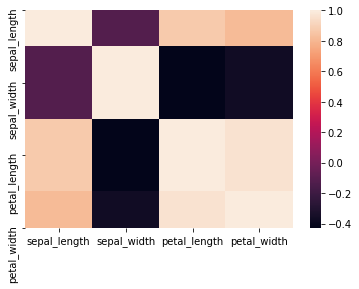

In [62]:
# corr 보고 feature를 선택-> Filter 방식
sns.heatmap(iris.corr())

In [64]:
iris_raw = iris.copy()

In [65]:
iris.drop(columns="petal_length", inplace=True)

feature를 하나 뺐는데도 성능 차이가 별로 없다.  
오캄의 면도칼 법칙에 따라서 feature가 적은게 더 좋다.

In [66]:
cross_val_score(KNeighborsClassifier(), iris.iloc[:, :-1], iris.iloc[:, -1], cv=10)

array([1.        , 0.86666667, 1.        , 0.93333333, 0.93333333,
       1.        , 0.86666667, 1.        , 1.        , 0.93333333])

위 방식은 좀 저질이다.  
다음은 Filter 방식의 더 고급진 예시.

In [68]:
from sklearn.feature_selection import SelectKBest, chi2

In [71]:
# chi2 : 카이제곱
ss = SelectKBest(score_func=chi2, k=2)

통계값에 의해서 좋은 순으로 feature를 k개 골라준다.

In [72]:
ss.fit_transform(iris.iloc[:, :-1], iris.iloc[:, -1])

array([[5.1, 0.2],
       [4.9, 0.2],
       [4.7, 0.2],
       [4.6, 0.2],
       [5. , 0.2],
       [5.4, 0.4],
       [4.6, 0.3],
       [5. , 0.2],
       [4.4, 0.2],
       [4.9, 0.1],
       [5.4, 0.2],
       [4.8, 0.2],
       [4.8, 0.1],
       [4.3, 0.1],
       [5.8, 0.2],
       [5.7, 0.4],
       [5.4, 0.4],
       [5.1, 0.3],
       [5.7, 0.3],
       [5.1, 0.3],
       [5.4, 0.2],
       [5.1, 0.4],
       [4.6, 0.2],
       [5.1, 0.5],
       [4.8, 0.2],
       [5. , 0.2],
       [5. , 0.4],
       [5.2, 0.2],
       [5.2, 0.2],
       [4.7, 0.2],
       [4.8, 0.2],
       [5.4, 0.4],
       [5.2, 0.1],
       [5.5, 0.2],
       [4.9, 0.2],
       [5. , 0.2],
       [5.5, 0.2],
       [4.9, 0.1],
       [4.4, 0.2],
       [5.1, 0.2],
       [5. , 0.3],
       [4.5, 0.3],
       [4.4, 0.2],
       [5. , 0.6],
       [5.1, 0.4],
       [4.8, 0.3],
       [5.1, 0.2],
       [4.6, 0.2],
       [5.3, 0.2],
       [5. , 0.2],
       [7. , 1.4],
       [6.4, 1.5],
       [6.9,

차원을 줄이면 차원의 저주를 피할 수 있다.